In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("Apontamento de horas para o TCS - Respostas ao formulário 1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carimbo de data/hora    50 non-null     object 
 1   Estudante               50 non-null     object 
 2   Horas trabalhas no TCS  50 non-null     int64  
 3   Link da tarefa          50 non-null     object 
 4   No que trabalhou?       50 non-null     object 
 5   Total de horas          1 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


In [3]:
df.head(100)

,Carimbo de data/hora,Estudante,Horas trabalhas no TCS,Link da tarefa,No que trabalhou?,Total de horas
0,14/03/2024 21:17:36,Kanydian,1,https://trello.com/c/GOOfPHxl,Documentação,144.0
1,22/03/2024 19:12:24,Lucas,4,https://trello.com/c/GOOfPHxl,Documentação,NaN
2,22/03/2024 19:44:03,Kanydian,2,https://trello.com/c/yTvJ3i4V,Documentação,NaN
3,22/03/2024 19:52:10,Vagner,2,https://trello.com/c/ADsVehK1,Documentação,NaN
4,22/03/2024 20:35:54,Vagner,2,https://trello.com/c/ADsVehK1,Documentação,NaN
5,28/03/2024 06:36:40,Kanydian,1,https://trello.com/c/yTvJ3i4V,Documentação,NaN
6,01/04/2024 06:47:08,Kanydian,1,https://trello.com/c/yTvJ3i4V,Documentação,NaN
7,05/04/2024 07:03:59,Kanydian,1,https://trello.com/c/b2MV9z0U,Documentação,NaN
8,05/04/2024 18:00:26,Kanydian,4,https://trello.com/c/b2MV9z0U,Documentação,NaN
9,05/04/2024 20:41:34,Lucas,4,https://trello.com/c/b2MV9z0U,Documentação,NaN


In [10]:
df["Carimbo de data/hora"] = pd.to_datetime(df["Carimbo de data/hora"])
df["MES"] = df["Carimbo de data/hora"].apply(lambda x: x.month)

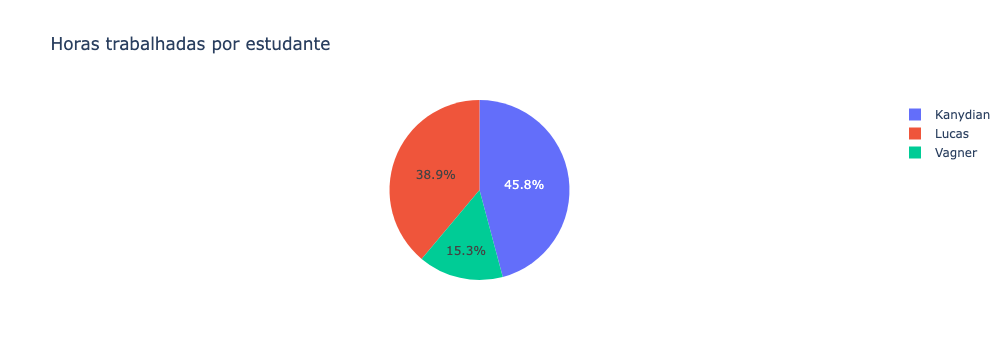

In [11]:
fig_total_hours = px.pie(df, values="Horas trabalhas no TCS", names="Estudante", title="Horas trabalhadas por estudante")
fig_total_hours.show()

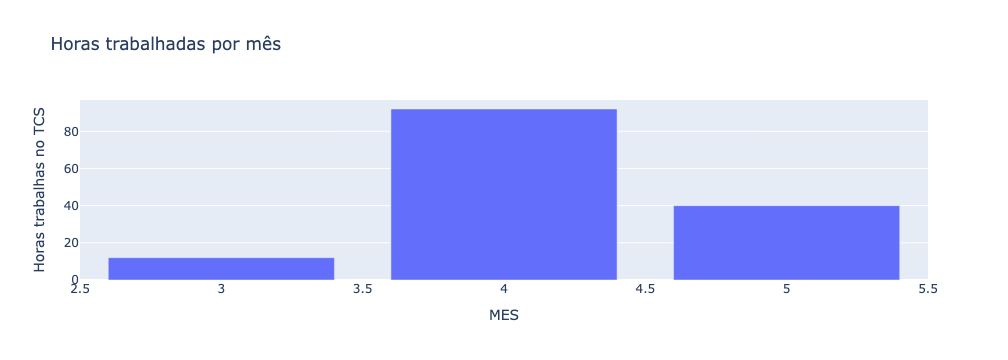

In [12]:
df_filtred = df.groupby("MES")["Horas trabalhas no TCS"].sum()
df_filtred = pd.DataFrame(df_filtred)
df_filtred["MES"] = df_filtred.index
df_filtred.index.name = "Indice"
fig_hours_month = px.bar(df_filtred, x="MES", y="Horas trabalhas no TCS", title="Horas trabalhadas por mês")
fig_hours_month.show()

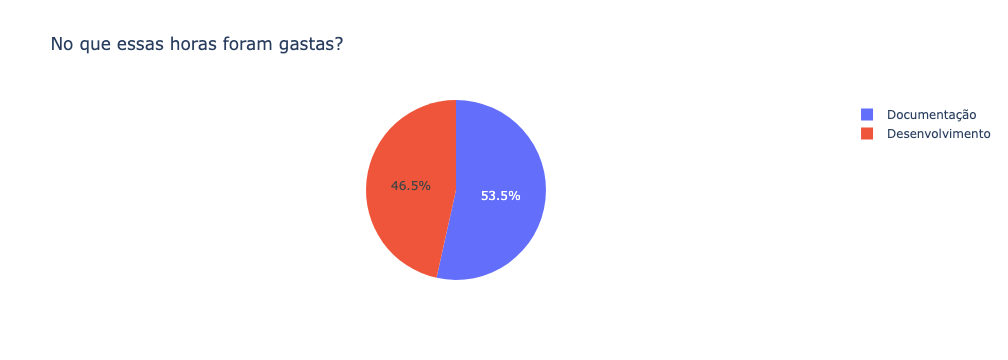

In [13]:
fig_total_project = px.pie(df, values="Horas trabalhas no TCS", names="No que trabalhou?", title="No que essas horas foram gastas?")
fig_total_project.show()